In [1]:
import os

import pandas as pd
import numpy as np


In [2]:
cocktail_reviews_datapath = os.path.join('..', '..', 'Dataset', 'PRADA_cocktail_reviews.json')
all_recipe_reviews_datapath = os.path.join('..', '..', 'Dataset', 'all_recipe_cocktail_reviews.json')
movieLens_ratings_datapath = os.path.join('..', 'Model', 'ml-latest-small', 'ratings.csv')

prada_interactions = pd.read_json(cocktail_reviews_datapath)
allRecipe_interactions = pd.read_json(all_recipe_reviews_datapath)["cocktail_reviews"].apply(pd.Series)
movieLens_ratings = pd.read_csv(movieLens_ratings_datapath)

# userId == 'Allrecipes Member'인 데이터 제거
allRecipe_interactions = allRecipe_interactions[allRecipe_interactions["User"] != "Allrecipes Member"]

# json을 Dataframe으로 변환
allRecipe_userMapping = {name:idx for idx, name in enumerate(allRecipe_interactions["User"].unique())}
allRecipe_cocktailMapping = {name:idx for idx, name in enumerate(allRecipe_interactions["Cocktail"].unique())}

# Dataframe의 User, Item을 숫자로 변환
allRecipe_interactions["User"] = allRecipe_interactions["User"].apply(lambda x: allRecipe_userMapping[x])
allRecipe_interactions["Cocktail"] = allRecipe_interactions["Cocktail"].apply(lambda x: allRecipe_cocktailMapping[x])

allRecipe_interactions = allRecipe_interactions[["User", "Cocktail", "Rating", "Date"]]
allRecipe_interactions.columns = ["userId", "cocktailId", "rating", "timestamp"]

<Axes: >

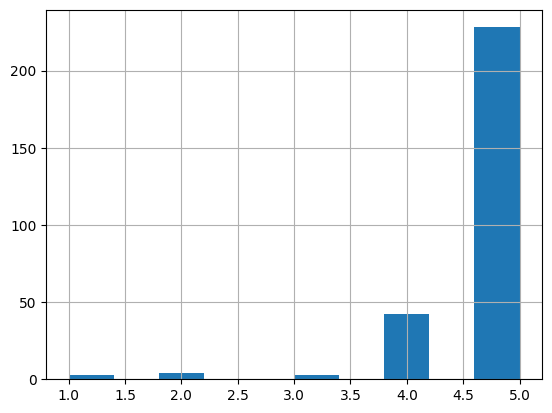

In [3]:
# review가 4개 이상인 유저만 추출
allRecipe_interactions.groupby("userId").filter(lambda x: len(x) >= 4)["rating"].hist()


<Axes: >

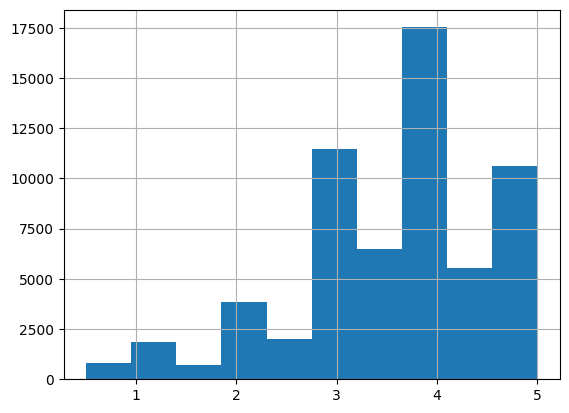

In [4]:
movieLens_ratings.groupby("userId").filter(lambda x: len(x) <= 500)["rating"].hist()

In [5]:
# movieLens의 user별 review 수 확인
temp = movieLens_ratings.groupby("userId").count()["rating"]
print(min(temp), max(temp))
print(temp)

20 2698
userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64


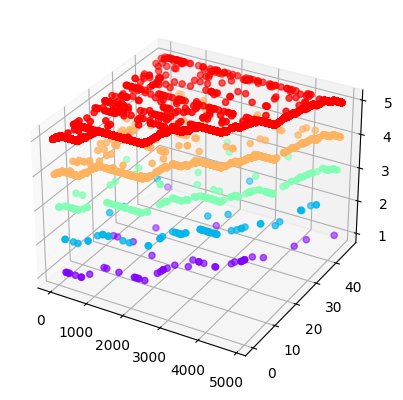

In [6]:
import matplotlib.pyplot as plt

# 평점 데이터 3차원으로 나타내기
x, y, z = allRecipe_interactions["userId"], allRecipe_interactions["cocktailId"], allRecipe_interactions["rating"]

ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='rainbow')

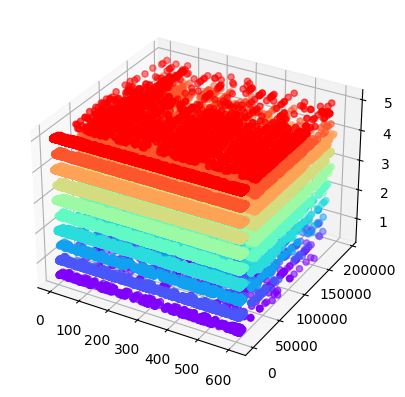

In [7]:
x, y, z = movieLens_ratings["userId"], movieLens_ratings["movieId"], movieLens_ratings["rating"]

ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='rainbow')

In [346]:
# import numpy as np
# from scipy.stats import norm

# # allRecipe dataset의 평균과 표준편차 계산
# allrecipe_mean = allRecipe_interactions.rating.mean()
# allrecipe_std = allRecipe_interactions.rating.std()

# # movieLens dataset의 평균과 표준편차 계산
# movielens_mean = movieLens_ratings.rating.mean()
# movielens_std = movieLens_ratings.rating.std()

# # movieLens dataset의 rating을 allRecipe dataset의 분포에 맞게 변환
# movieLens_ratings.rating = norm(loc=movielens_mean, scale=movielens_std).cdf(movieLens_ratings.rating)
# movieLens_ratings.rating = norm(loc=allrecipe_mean, scale=allrecipe_std).ppf(movieLens_ratings.rating)

# # 두 데이터셋의 분포가 맞게 변환된 것을 확인
# print("allRecipe dataset 평균:", allRecipe_interactions.rating.mean())
# print("allRecipe dataset 표준편차:", allRecipe_interactions.rating.std())
# print("movieLens dataset 평균:", movieLens_ratings.rating.mean())
# print("movieLens dataset 표준편차:", movieLens_ratings.rating.std())


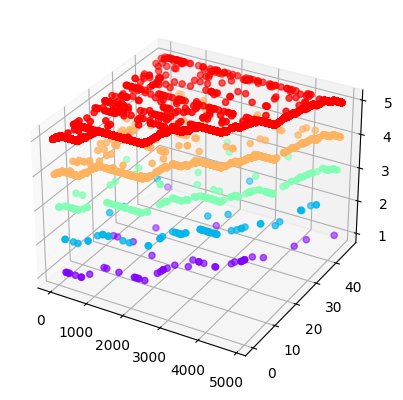

In [8]:
x, y, z = allRecipe_interactions["userId"], allRecipe_interactions["cocktailId"], allRecipe_interactions["rating"]

ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='rainbow')

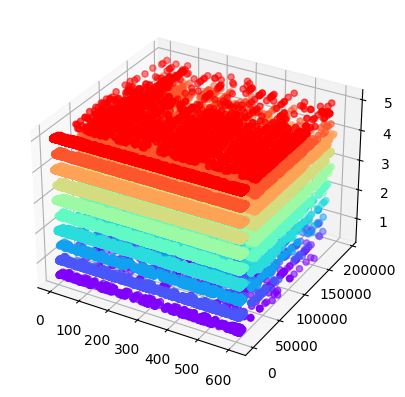

In [9]:
x, y, z = movieLens_ratings["userId"], movieLens_ratings["movieId"], movieLens_ratings["rating"]

ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='rainbow')

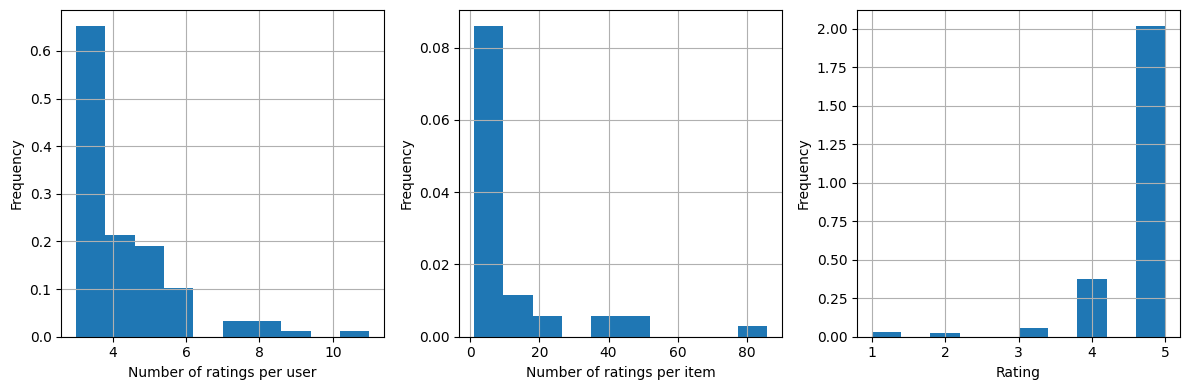

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

filtered = allRecipe_interactions.groupby("userId").filter(lambda x: len(x)>=3)

filtered["userId"].value_counts().hist(ax=axes[0], density=True)
axes[0].set_xlabel("Number of ratings per user")
axes[0].set_ylabel("Frequency")

filtered["cocktailId"].value_counts().hist(ax=axes[1], density=True)
axes[1].set_xlabel("Number of ratings per item")
axes[1].set_ylabel("Frequency")

filtered["rating"].hist(ax=axes[2], density=True)
axes[2].set_xlabel("Rating")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()



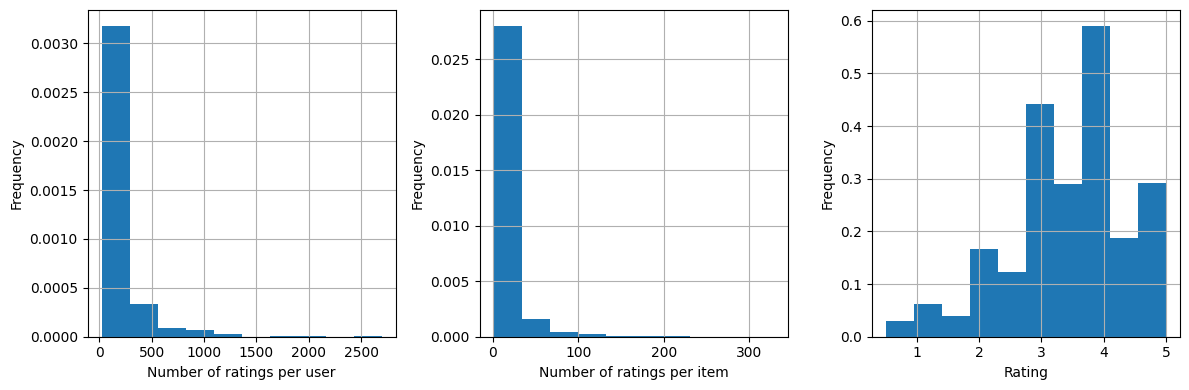

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

filtered = movieLens_ratings#.groupby("userId").filter(lambda x: 500>len(x))
filtered["userId"].value_counts().hist(ax=axes[0], density=True)
axes[0].set_xlabel("Number of ratings per user")
axes[0].set_ylabel("Frequency")

filtered["movieId"].value_counts().hist(ax=axes[1], density=True)
axes[1].set_xlabel("Number of ratings per item")
axes[1].set_ylabel("Frequency")

filtered["rating"].hist(ax=axes[2], density=True)
axes[2].set_xlabel("Rating")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [49]:
# rating=4.5인 데이터는 5.0으로 변환
movieLens_ratings.loc[movieLens_ratings["rating"] == 0.5, "rating"] = 1.0
movieLens_ratings.loc[movieLens_ratings["rating"] == 1.5, "rating"] = 2.0
movieLens_ratings.loc[movieLens_ratings["rating"] == 2.5, "rating"] = 3.0
movieLens_ratings.loc[movieLens_ratings["rating"] == 3.5, "rating"] = 4.0
movieLens_ratings.loc[movieLens_ratings["rating"] == 4.5, "rating"] = 5.0

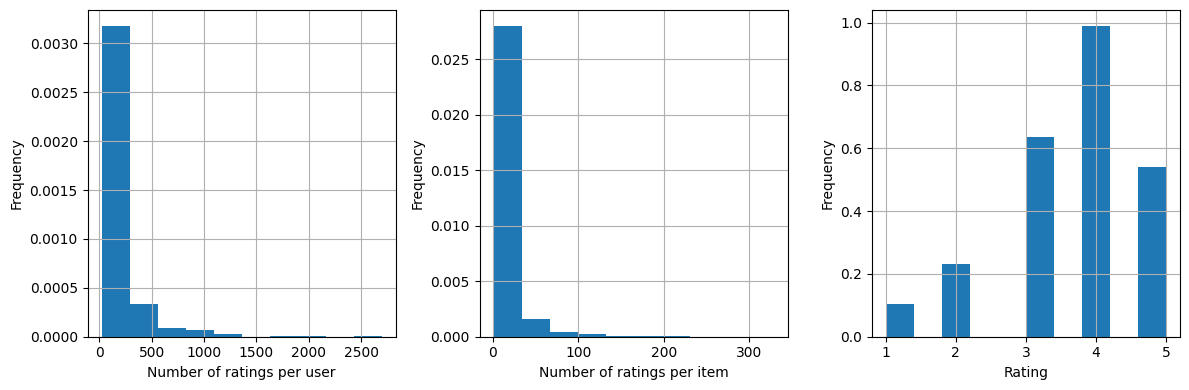

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

filtered = movieLens_ratings#.groupby("userId").filter(lambda x: 500>len(x))
filtered["userId"].value_counts().hist(ax=axes[0], density=True)
axes[0].set_xlabel("Number of ratings per user")
axes[0].set_ylabel("Frequency")

filtered["movieId"].value_counts().hist(ax=axes[1], density=True)
axes[1].set_xlabel("Number of ratings per item")
axes[1].set_ylabel("Frequency")

filtered["rating"].hist(ax=axes[2], density=True)
axes[2].set_xlabel("Rating")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [51]:
# movieLens dataset의 rating==4.0인 row 추출
indices = movieLens_ratings[movieLens_ratings["rating"] == 4.0].index

# 0.5 확률로 rating==4.0인 row의 rating을 5.0으로 변환
for i in indices:
    if np.random.rand() < 0.75:
        movieLens_ratings.loc[i, "rating"] = 5.0

indices = movieLens_ratings[movieLens_ratings["rating"] == 3.0].index

# 0.5 확률로 rating==3.0인 row의 rating을 4.0으로 변환
for i in indices:
    if np.random.rand() < 0.5:
        movieLens_ratings.loc[i, "rating"] = 4.0


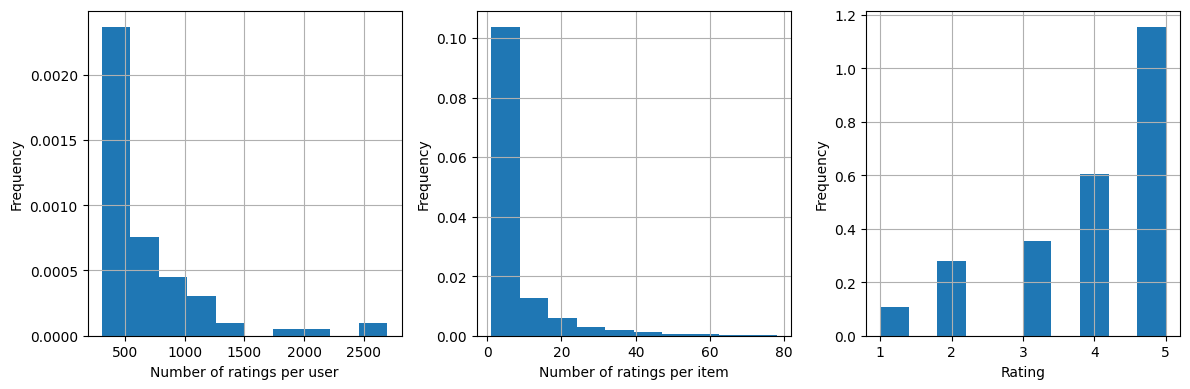

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

filtered = movieLens_ratings.groupby("userId").filter(lambda x: len(x)>300)
filtered["userId"].value_counts().hist(ax=axes[0], density=True)
axes[0].set_xlabel("Number of ratings per user")
axes[0].set_ylabel("Frequency")

filtered["movieId"].value_counts().hist(ax=axes[1], density=True)
axes[1].set_xlabel("Number of ratings per item")
axes[1].set_ylabel("Frequency")

filtered["rating"].hist(ax=axes[2], density=True)
axes[2].set_xlabel("Rating")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [58]:
# rating!=5.0인 row를 0.5 확률로 제거
indices = movieLens_ratings[movieLens_ratings["rating"] != 5.0].index
for i in indices:
    if np.random.rand() < 0.75:
        movieLens_ratings.drop(i, inplace=True)

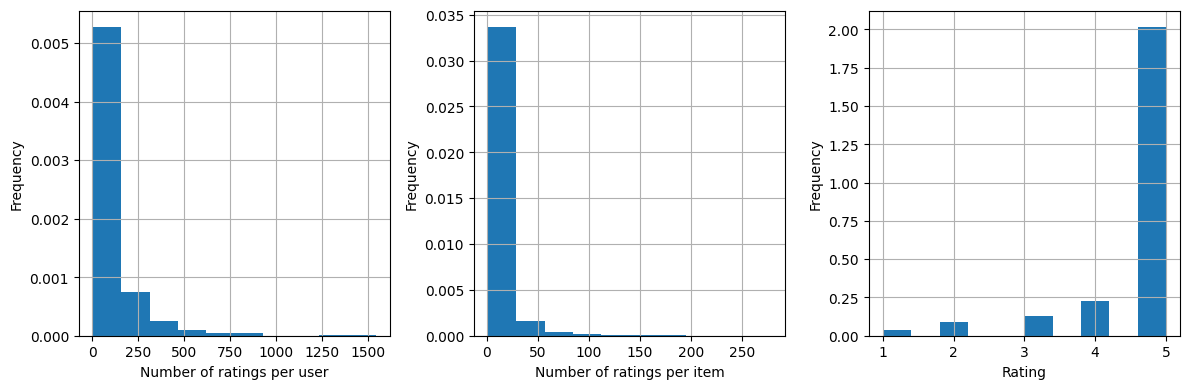

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

filtered = movieLens_ratings#.groupby("userId").filter(lambda x: len(x)>300)
filtered["userId"].value_counts().hist(ax=axes[0], density=True)
axes[0].set_xlabel("Number of ratings per user")
axes[0].set_ylabel("Frequency")

filtered["movieId"].value_counts().hist(ax=axes[1], density=True)
axes[1].set_xlabel("Number of ratings per item")
axes[1].set_ylabel("Frequency")

filtered["rating"].hist(ax=axes[2], density=True)
axes[2].set_xlabel("Rating")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

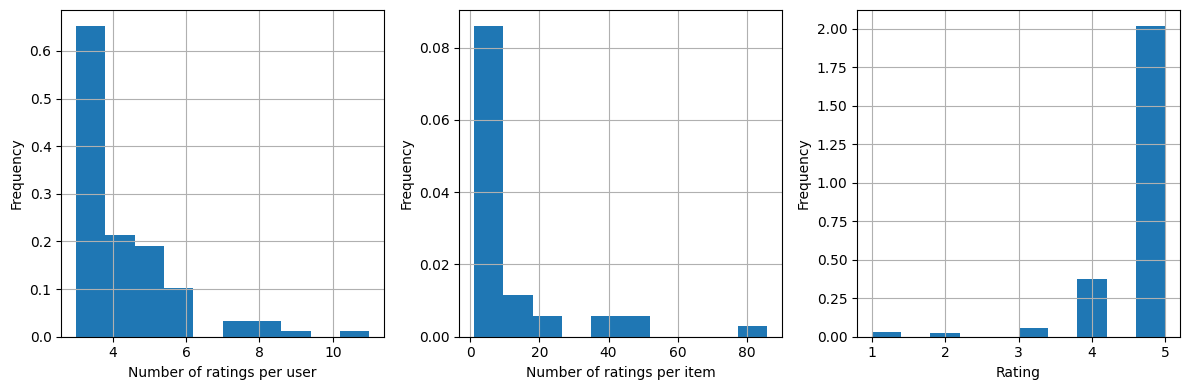

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

filtered = allRecipe_interactions.groupby("userId").filter(lambda x: len(x)>=3)

filtered["userId"].value_counts().hist(ax=axes[0], density=True)
axes[0].set_xlabel("Number of ratings per user")
axes[0].set_ylabel("Frequency")

filtered["cocktailId"].value_counts().hist(ax=axes[1], density=True)
axes[1].set_xlabel("Number of ratings per item")
axes[1].set_ylabel("Frequency")

filtered["rating"].hist(ax=axes[2], density=True)
axes[2].set_xlabel("Rating")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()



In [60]:
filtered = movieLens_ratings.groupby("userId").filter(lambda x: len(x)>300)
filtered

,userId,movieId,rating,timestamp
1772,18,1,5.0,1455209816
1775,18,16,5.0,1461311583
1776,18,32,5.0,1455209840
1778,18,36,5.0,1455617478
1779,18,47,5.0,1455050013
...,...,...,...,...
100830,610,166528,5.0,1493879365
100831,610,166534,5.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047


In [61]:
# 데이터셋 저장
movieLens_ratings.to_csv(os.path.join("..", "Model", "movieLens_ratings2.csv"), index=False)